In [1]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submmission.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_2.zip
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_l0Auv8Q.csv

--2020-07-19 17:50:25--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submmission.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.100
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 599266 (585K) [text/csv]
Saving to: ‘sample_submmission.csv’

sample_submmission. 100%[===================>] 585.22K   181KB/s    in 3.2s    

2020-07-19 17:50:30 (181 KB/s) - ‘sample_submmission.csv’ saved [599266/599266]

--2020-07-19 17:50:32--  https://datahack-prod.s3.amazonaws.com/train_file/Train_2.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.88
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932294 (910K) [application/zip]
Saving to: ‘Train_2.zip’

Train_2.zip   

In [2]:
!unzip Train_2.zip

Archive:  Train_2.zip
   creating: Train/
  inflating: Train/Data_Dictionary.xlsx  
   creating: __MACOSX/
   creating: __MACOSX/Train/
  inflating: __MACOSX/Train/._Data_Dictionary.xlsx  
  inflating: Train/First_Health_Camp_Attended.csv  
  inflating: Train/Health_Camp_Detail.csv  
  inflating: Train/Patient_Profile.csv  
  inflating: Train/Second_Health_Camp_Attended.csv  
  inflating: Train/Third_Health_Camp_Attended.csv  
  inflating: Train/Train.csv         


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train=pd.read_csv('Train/Train.csv')
ha1=pd.read_csv('Train/Health_Camp_Detail.csv')
ha2=pd.read_csv('Train/Patient_Profile.csv')
h1=pd.read_csv('Train/First_Health_Camp_Attended.csv')
h2=pd.read_csv('Train/Second_Health_Camp_Attended.csv')
h3=pd.read_csv('Train/Third_Health_Camp_Attended.csv')
test=pd.read_csv('test_l0Auv8Q.csv')
sub=pd.read_csv('sample_submmission.csv')

In [5]:
train.head(2),test.head(2),train.shape,test.shape,train.nunique(),test.nunique()

(   Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5
 0      489652            6578         10-Sep-05     4     0     0     0     2
 1      507246            6578         18-Aug-05    45     5     0     0     7,
    Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  Var5
 0      505701            6548         21-May-06     1     0     0     0     2
 1      500633            6584         02-Jun-06     0     0     0     0     0,
 (75278, 8),
 (35249, 8),
 Patient_ID           29828
 Health_Camp_ID          44
 Registration_Date     1201
 Var1                   127
 Var2                    77
 Var3                     2
 Var4                     5
 Var5                    30
 dtype: int64,
 Patient_ID           15324
 Health_Camp_ID          21
 Registration_Date      375
 Var1                    92
 Var2                    69
 Var3                     2
 Var4                     8
 Var5                    30
 dtype: int64)

In [6]:
h1.head(2),h1.nunique(),h2.head(2),h2.nunique(),h3.head(2),h3.nunique()

(   Patient_ID  Health_Camp_ID  Donation  Health_Score  Unnamed: 4
 0      506181            6560        40      0.439024         NaN
 1      494977            6560        20      0.097561         NaN,
 Patient_ID        3548
 Health_Camp_ID      34
 Donation            24
 Health_Score      3826
 Unnamed: 4           0
 dtype: int64,
    Patient_ID  Health_Camp_ID  Health Score
 0      526631            6536      0.875136
 1      509122            6536      0.755700,
 Patient_ID        6123
 Health_Camp_ID       6
 Health Score       208
 dtype: int64,
    Patient_ID  ...  Last_Stall_Visited_Number
 0      517875  ...                          1
 1      504692  ...                          1
 
 [2 rows x 4 columns],
 Patient_ID                   5340
 Health_Camp_ID                  4
 Number_of_stall_visited         8
 Last_Stall_Visited_Number       8
 dtype: int64)

In [7]:
train=train.merge(h1, on = ['Patient_ID','Health_Camp_ID'], how='left')
test=test.merge(h1, on = ['Patient_ID','Health_Camp_ID'], how='left')
train=train.merge(h2, on = ['Patient_ID','Health_Camp_ID'], how='left')
test=test.merge(h2, on = ['Patient_ID','Health_Camp_ID'], how='left')
train=train.merge(h3, on = ['Patient_ID','Health_Camp_ID'], how='left')
test=test.merge(h3, on = ['Patient_ID','Health_Camp_ID'], how='left')

In [8]:
ha1.head(2),ha1.nunique(),ha2.head(2),ha2.nunique()

(   Health_Camp_ID Camp_Start_Date Camp_End_Date Category1 Category2  Category3
 0            6560       16-Aug-03     20-Aug-03     First         B          2
 1            6530       16-Aug-03     28-Oct-03     First         C          2,
 Health_Camp_ID     65
 Camp_Start_Date    58
 Camp_End_Date      54
 Category1           3
 Category2           7
 Category3           2
 dtype: int64,
    Patient_ID  Online_Follower  ...  City_Type  Employer_Category
 0      516956                0  ...        NaN  Software Industry
 1      507733                0  ...          H  Software Industry
 
 [2 rows x 11 columns],
 Patient_ID           37633
 Online_Follower          2
 LinkedIn_Shared          2
 Twitter_Shared           2
 Facebook_Shared          2
 Income                   8
 Education_Score        228
 Age                     51
 First_Interaction     1476
 City_Type                9
 Employer_Category       14
 dtype: int64)

In [9]:
train=train.merge(ha1, on = ['Health_Camp_ID'], how='left')
test=test.merge(ha1, on = ['Health_Camp_ID'], how='left')
train=train.merge(ha2, on = ['Patient_ID'], how='left')
test=test.merge(ha2, on = ['Patient_ID'], how='left')

In [10]:
train.head(5)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,None,None,None,07-Feb-04,I,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1,70,40,04-Jul-03,I,Technology


In [11]:
test.head(5)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,505701,6548,21-May-06,1,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,13-Jun-06,18-Aug-06,Third,G,2,0,0,0,0,0,None,44,05-Feb-03,E,NaN
1,500633,6584,02-Jun-06,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,04-Aug-06,09-Aug-06,Second,A,2,0,1,0,0,1,67,41,11-Dec-04,D,Consulting
2,506945,6582,10-Aug-06,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,06-Apr-06,07-Nov-07,First,F,2,0,0,0,0,None,None,None,19-Apr-06,NaN,NaN
3,497447,6551,27-Aug-06,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,13-Nov-06,18-Nov-06,Second,D,2,0,0,0,0,0,None,47,25-Aug-06,B,NaN
4,496446,6533,19-Sep-06,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,20-Sep-06,23-Sep-06,First,E,2,0,0,0,0,None,None,None,19-Sep-06,B,NaN


In [12]:
del test['Unnamed: 4']
del train['Unnamed: 4']
del train['Donation']
del test['Donation']

In [13]:
"""
del test['Income']
del train['Income']
del train['Education_Score']
del test['Education_Score']
del train['Age']
del test['Age']
"""

"\ndel test['Income']\ndel train['Income']\ndel train['Education_Score']\ndel test['Education_Score']\ndel train['Age']\ndel test['Age']\n"

In [14]:
x=['Health_Score','Health Score','Number_of_stall_visited','Last_Stall_Visited_Number']
for i in x:
  train[i]=train[i].fillna(0)
  test[i]=test[i].fillna(0)

In [15]:
train['outcome']=(train['Health_Score']+train['Health Score'])+(train['Number_of_stall_visited']+train['Last_Stall_Visited_Number']/30)+0.46106432158133853
#train['outcome']=(train['Health_Score']+train['Health Score'])+ 0.46106432158133853

In [16]:
#x=train['Health_Score']+train['Health Score']
#x=train['Number_of_stall_visited']+train['Last_Stall_Visited_Number']
#x.nunique(),x.value_counts(),x.mean()

In [ ]:
x=['Health_Score','Health Score','Number_of_stall_visited','Last_Stall_Visited_Number']
for i in x:
  del train[i]
  del test[i]

In [ ]:
x=['Registration_Date','City_Type','Employer_Category']
for i in x:
  train[i]=train[i].fillna(method='bfill')
  test[i]=test[i].fillna(method='bfill')
  train[i]=train[i].fillna(method='ffill')
  test[i]=test[i].fillna(method='ffill')

In [ ]:
k=['Registration_Date','Camp_Start_Date','Camp_End_Date','First_Interaction']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])
for i in k:
  test[i+'_'+'year'] = test[i].dt.year
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  train[i+'_'+'year'] = train[i].dt.year
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'dayofweek'] = train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)
for i in k:
  del train[i]
  del test[i]

In [ ]:
x=['City_Type','Employer_Category','Category1','Category2','Income','Education_Score','Age']
for i in x:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_df=train
test_df=test

In [ ]:
X = train_df.drop(labels=['outcome'], axis=1)
y = train_df['outcome'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 90,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 500
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's l1: 0.333127
[200]	valid_0's l1: 0.332019
[300]	valid_0's l1: 0.332353
[400]	valid_0's l1: 0.3331
Early stopping, best iteration is:
[224]	valid_0's l1: 0.331735
RMSLE: 3.2903184328114157


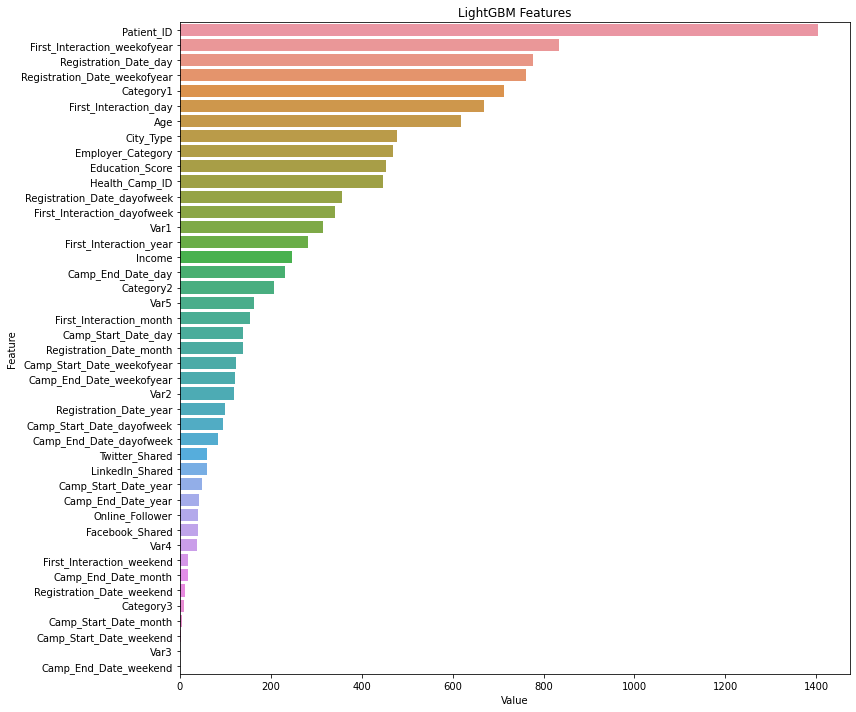

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             10, shuffle=False, random_state=2**31)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=800, max_depth=31, learning_rate=0.1, n_estimators=1000, min_child_samples=20, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_absolute_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.5928905363864839
RMSLE LGBM:  0.581396164077793
RMSLE LGBM:  0.5644889632211486
RMSLE LGBM:  0.569938352411321
RMSLE LGBM:  0.5791099776552955
RMSLE LGBM:  0.5775829065667869
RMSLE LGBM:  0.5957694530408458
RMSLE LGBM:  0.5727950071505521
RMSLE LGBM:  0.5876236152417094
RMSLE LGBM:  0.6018246191655164


In [ ]:
np.mean(errlgb,0)

0.5823419594917453

In [ ]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([2.45183606, 0.77133664, 0.51658136, ..., 0.71380613, 0.61873717,
       0.77176541])

In [ ]:
sub['Outcome']=abs(lgbm_final)

In [ ]:
sub.to_csv('f1_av.csv',index=False)

In [ ]:
sub.head(2)

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,2.451836
1,500633,6584,0.771337


In [ ]:
from google.colab import files
files.download('f1_av.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ensem

In [17]:
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics/867_613210_us_f1_av_14.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics/867_613210_us_final_x.csv

--2020-07-19 18:16:49--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics/867_613210_us_f1_av_14.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.120
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085224 (1.0M) [application/vnd.ms-excel]
Saving to: ‘867_613210_us_f1_av_14.csv’

867_613210_us_f1_av 100%[===================>]   1.03M   749KB/s    in 1.4s    

2020-07-19 18:16:51 (749 KB/s) - ‘867_613210_us_f1_av_14.csv’ saved [1085224/1085224]

--2020-07-19 18:16:53--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-healthcare-analytics/867_613210_us_final_x.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.112
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.112|:443... connected.
HTTP request sent, aw

In [31]:
a=pd.read_csv('867_613210_us_final_x.csv')
b=pd.read_csv('867_613210_us_f1_av_14.csv')

In [32]:
a.head(2)

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.662885
1,500633,6584,0.450871


In [33]:
c=a['Outcome']*0.85+b['Outcome']*0.15

In [34]:
a['Outcome']=c

In [35]:
a.to_csv('ensem.csv',index=False)

In [36]:
from google.colab import files
files.download('ensem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>